# III - Est-ce que le nutriscore contribue à améliorer la santé des français ? Dans ce but, est - ce que le nutriscore permet de manger équilibrer ?


## a) Nos variables


Nous allons commencer par sélectionner les colonnes qu'il nous faut pour améliorer la santé des français.

Certains organismes officiels, comme l’AFSSA (Agence française de sécurité sanitaire des aliments), ont crée des recommandations sous forme d’apports nutritionnels conseillés (ANC) pour chaque type de nutriment.

source : https://www.vidal.fr/sante/nutrition/equilibre-alimentaire-adulte/recommandations-nutritionnelles-adulte/en-pratique.html

Selon le tableau nutritionnel, voici les informations dont nous avons besoin : Glucides, Lipides, Protéines, Fibres.

Comment le Nutri-Score Fr est-il calculé?

Selon le document officiel, nous savons que selon les nutriments des points positifs ou négatifs sont appliqués :

- Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

- Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).

Sélectionnons donc seulement les colonnes nécessaires à notre étude. Nous sélectionnons tous les aliments même ceux qui ne sont pas vendus en France. En effet, ils peuvent être vendus prochainement et être interessant pour notre étude.

In [199]:
data.columns

Index(['code', 'created_datetime', 'product_name', 'countries',
       'countries_tags', 'countries_fr', 'ingredients_text', 'additives_n',
       'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'main_category', 'main_category_fr',
       'energy_100g', 'fat_100g', 'saturated_fat_100g', 'carbohydrates_100g',
       'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g',
       'sodium_100g', 'nutrition_score_fr_100g', 'nutrition-score-uk_100g',
       'reg_additives', 'reg_energy', 'reg_fat', 'reg_saturated_fat',
       'reg_carbohydrates', 'reg_fiber', 'reg_protein', 'reg_salt', 'year',
       'month', 'year_month', 'alpha3'],
      dtype='object')

In [217]:
data_study = data[["code", "product_name",  'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n',
            "ingredients_text","energy_100g", "carbohydrates_100g", "proteins_100g", "fat_100g",
            "saturated_fat_100g", "fiber_100g", "sugars_100g", "salt_100g", "sodium_100g",
             "additives_n", 
            "nutrition_grade_fr", "main_category", "nutrition_score_fr_100g", 'reg_additives',
       'reg_energy', 'reg_fat', 'reg_carbohydrates', 'reg_fiber', "reg_salt",
       'reg_protein']]

In [218]:
data_study=data_study.loc[(pd.isna(data.energy_100g)==False) & (pd.isna(data.carbohydrates_100g)==False) & (pd.isna(data.proteins_100g)==False) & (pd.isna(data.fat_100g)==False)
       & (pd.isna(data["fiber_100g"])==False)& (pd.isna(data["additives_n"])==False)
& (pd.isna(data["nutrition_score_fr_100g"])==False)
                          
                 & (pd.isna(data["nutrition_grade_fr"])==False)
                 & (pd.isna(data["additives_n"])==False)]

## b) Quels sont les caractéristiques du nutriscore ?

#### Techniquement, voici les éléments qui agit sur le nutriscore :

Points négatifs : l'énergie, les graisses saturées, les sucres, et le sel (des niveaux élevés sont considérés comme mauvais pour la santé)

Points positifs : la proportion de fruits, de légumes, de noix, d'huiles d'olive, de colza et de noix, de fibres et de protéines (les niveaux élevés sont considérés comme bons pour la santé).


### Comparons les informations  des différentes notes.

Excluons les données non renseignées du Nutriscore.

In [219]:
dataN = data_study.loc[data["nutrition_grade_fr"]!="AUTRES"].sort_values(by=["nutrition_grade_fr"])


### Etudions le lien entre la variable nutrition_grade_fr et les autres variables.

In [220]:
dataN.describe()

,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,carbohydrates_100g,proteins_100g,fat_100g,saturated_fat_100g,fiber_100g,sugars_100g,salt_100g,sodium_100g,additives_n,nutrition_score_fr_100g
count,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000,64838.000000
mean,0.005398,0.041534,393.800472,12.297465,4.740160,3.089099,1.048028,1.452355,6.461460,0.895311,0.352485,1.667032,2.278818
std,0.074111,0.216075,244.823885,11.115141,6.129425,4.526895,2.005328,2.841038,8.245909,2.005498,0.789568,2.225447,5.440175
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,0.000000,0.000000,197.000000,4.760000,0.700000,0.000000,0.000000,0.000000,0.900000,0.083820,0.033000,0.000000,-1.000000
50%,0.000000,0.000000,347.000000,10.000000,2.560000,1.060000,0.000000,0.800000,3.330000,0.497840,0.196000,1.000000,1.000000
75%,0.000000,0.000000,573.000000,16.670000,6.060000,4.550000,1.330000,2.000000,9.357500,1.036320,0.408000,2.000000,5.000000
max,2.000000,4.000000,901.000000,100.000000,86.000000,100.000000,87.000000,45.000000,100.000000,40.000000,15.748031,24.000000,26.000000


In [221]:
def percentile(n):
    def percentile_(x):
        y=x.loc[pd.isna(x)==False]
        return np.percentile(y, n)
    percentile_.__name__ = 'percentile_%s' % n
    return percentile_

In [222]:
for col in data_study.select_dtypes(include=['float64']).columns:
    print(col)
    print(dataN.groupby("nutrition_grade_fr")[col].agg([np.median,np.min, np.max, percentile(25), percentile(75)]))

ingredients_from_palm_oil_n
                    median  amin  amax  percentile_25  percentile_75
nutrition_grade_fr                                                  
A                      0.0   0.0   2.0            0.0            0.0
B                      0.0   0.0   1.0            0.0            0.0
C                      0.0   0.0   2.0            0.0            0.0
D                      0.0   0.0   1.0            0.0            0.0
E                      0.0   0.0   1.0            0.0            0.0
ingredients_that_may_be_from_palm_oil_n
                    median  amin  amax  percentile_25  percentile_75
nutrition_grade_fr                                                  
A                      0.0   0.0   3.0            0.0            0.0
B                      0.0   0.0   3.0            0.0            0.0
C                      0.0   0.0   3.0            0.0            0.0
D                      0.0   0.0   4.0            0.0            0.0
E                      0.0   0.0   

moyenne ingredients_from_palm_oil_n = 0.005398069033591413
moyenne ingredients_that_may_be_from_palm_oil_n = 0.0415342854498905
moyenne energy_100g = 393.8004719454641
moyenne carbohydrates_100g = 12.297464510009561
moyenne proteins_100g = 4.740160247077331
moyenne fat_100g = 3.0890985872482184
moyenne saturated_fat_100g = 1.048028095561245
moyenne fiber_100g = 1.452355149757858
moyenne sugars_100g = 6.461460024985348
moyenne salt_100g = 0.8953109827327492
moyenne sodium_100g = 0.3524848644119578
moyenne additives_n = 1.6670316789537
moyenne nutrition_score_fr_100g = 2.2788179771121873


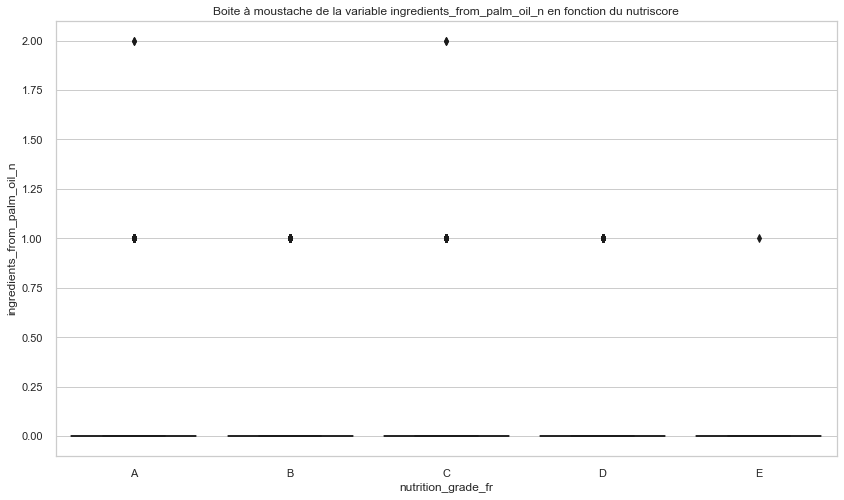

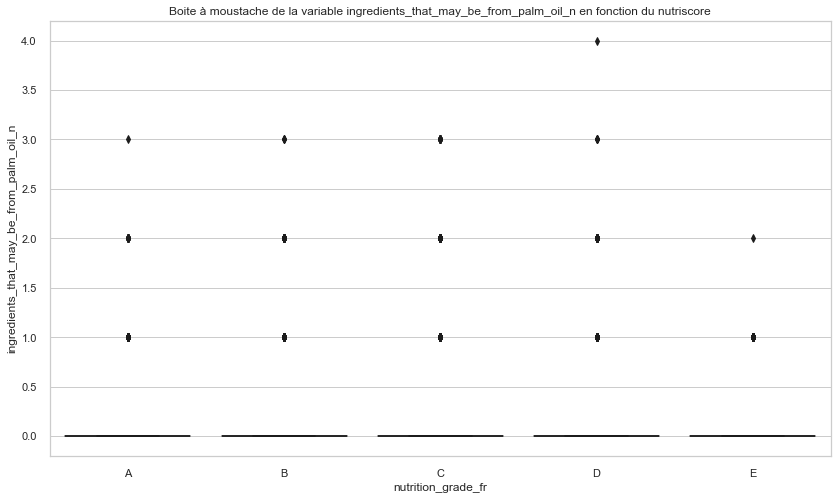

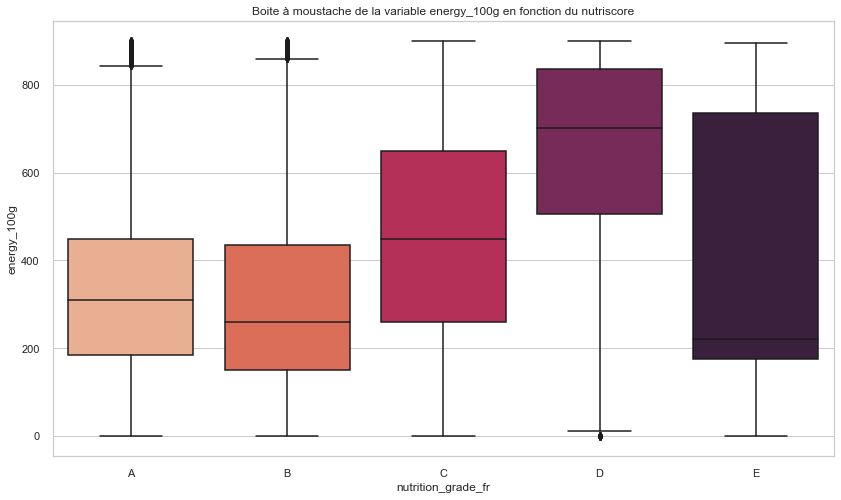

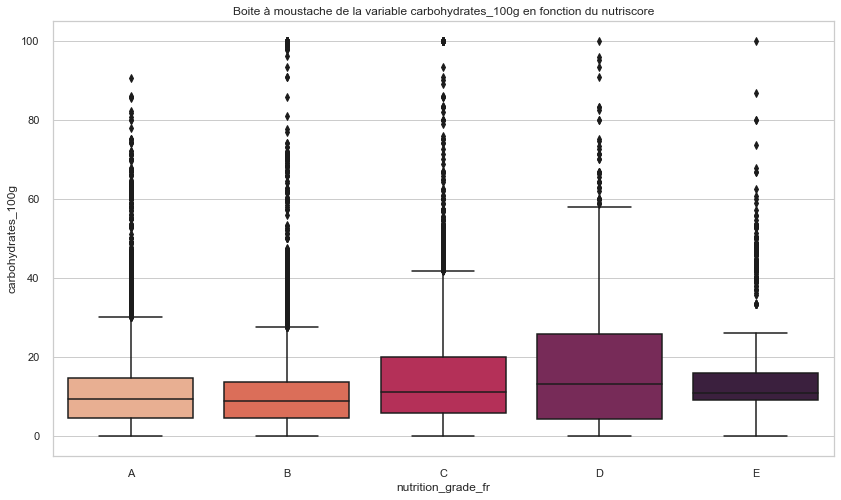

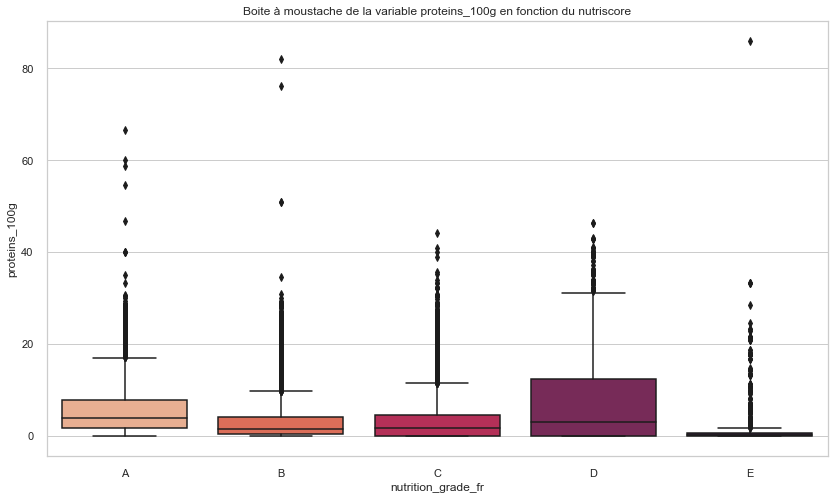

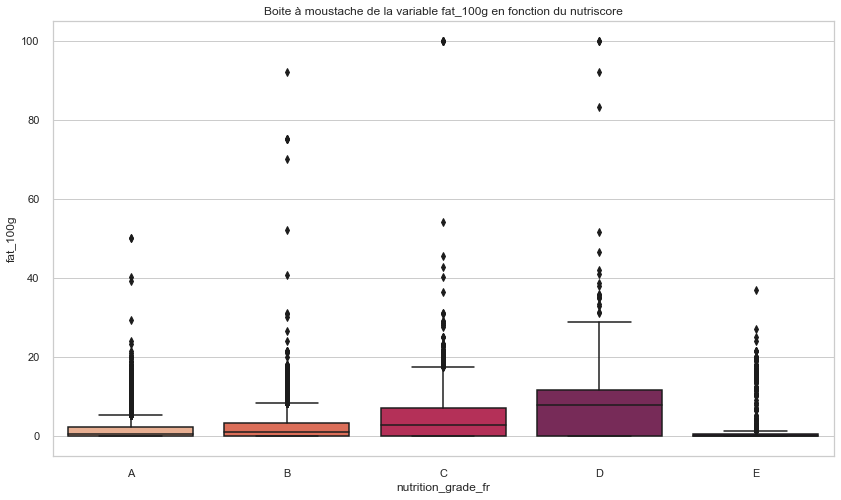

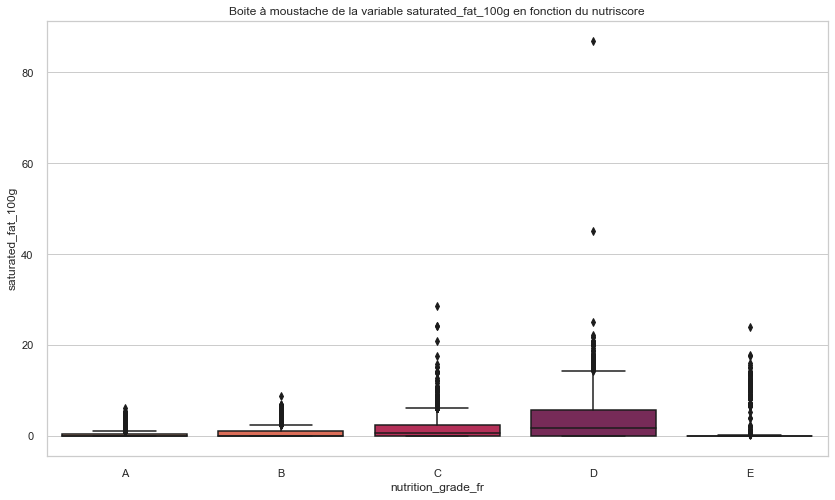

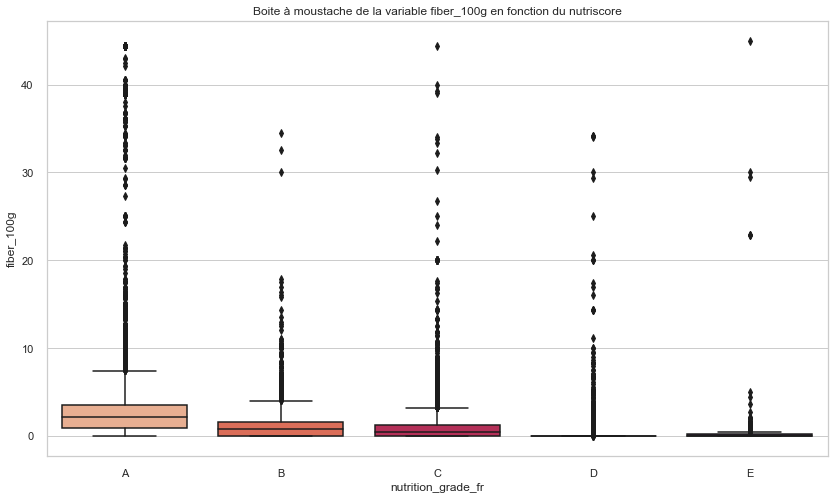

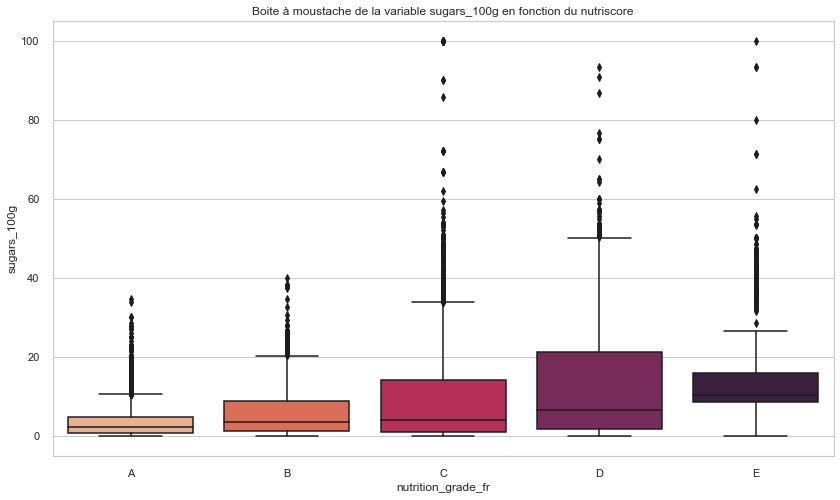

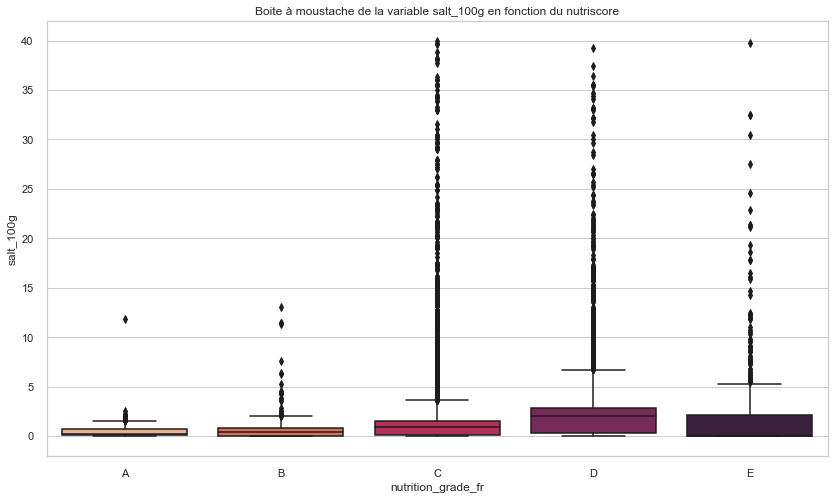

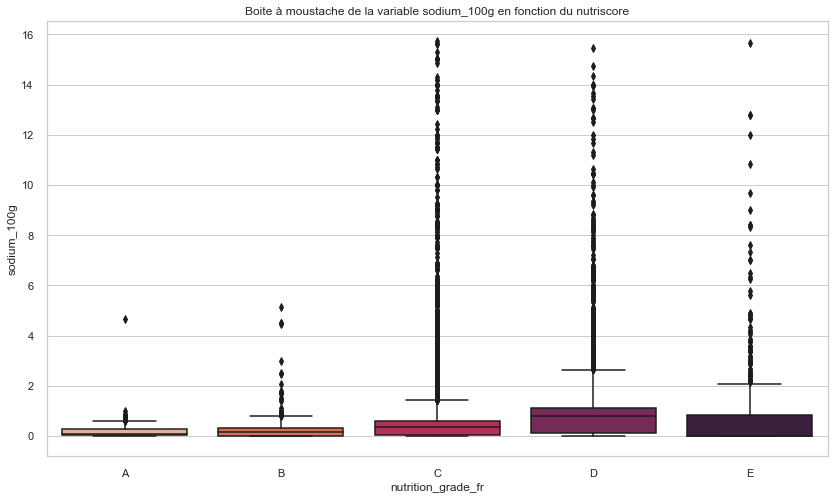

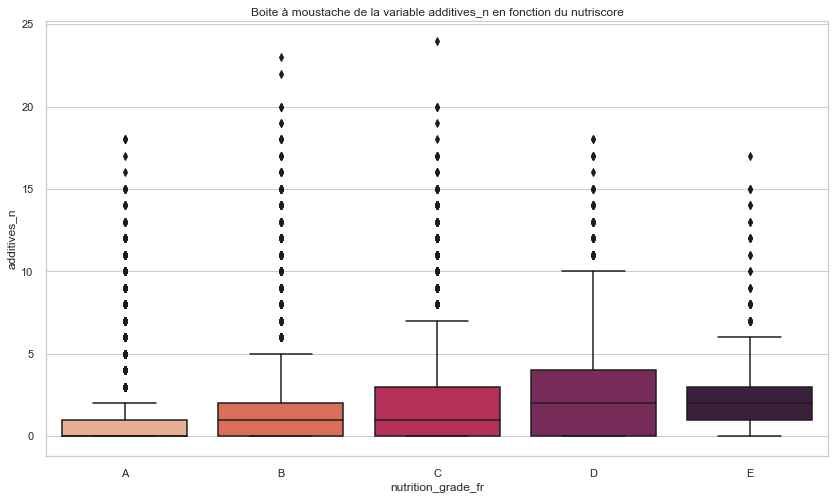

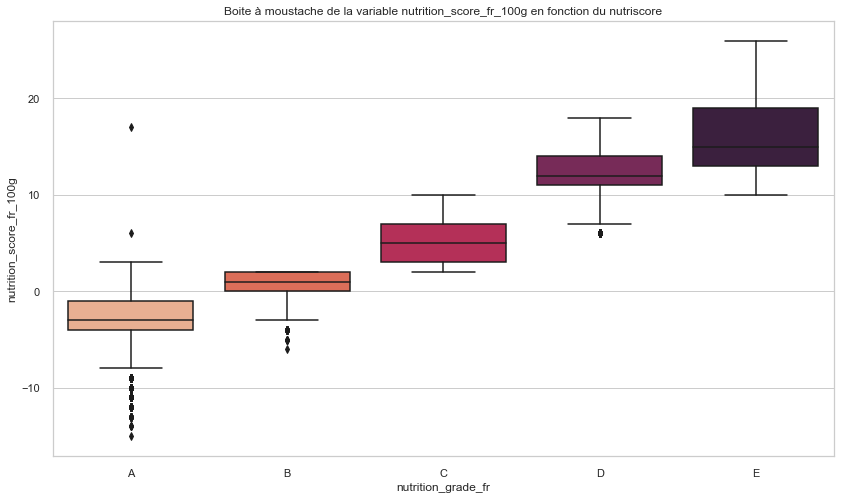

In [223]:
for col in data_study.select_dtypes(include=['float64']).columns:
    print("moyenne "+col +" = "+str(dataN[col].mean()))
    pk.graph_boxplot_by_group(dataN, col,"nutrition_grade_fr", "Boite à moustache de la variable "+col+" en fonction du nutriscore", "rocket_r", (14,8))

Les boites à moustache sont peu dispersées même si en fonction des notes, leurs dispersions peuvent être plus ou moins varié.

Essayons de comparer les deux notes extrêmes A et E.

Comment pouvons - nous décrire les aliments avec une note A ?
- riches en fibres et en protéines
- peu de sel, de sucre et de matières grasses (y compris en graisses saturés)
- faible en additifs
- apport en energie proche de la moyenne

Quels sont les aliments avec une note E ?
- riches en sucre, en additif et en glucides
- pauvres en fibres, proteines, sel
- un apport energétique qui varie beaucoup dans les extrêmes.


Nos deux groupes extrêmes s'opposent par leurs caractéristiques. Il semble que plus les aliments ont une note proche du A et plus ils sont bons pour la santé. Nos groupes ont l'air d'avoir des caractéristiques différentes et semblent distinct.

Confirmons nos résultats précédents en vérifiant si nos groupes formés par le nutriscore sont statistiquement différents. Pour cela, nous pourrions réaliser une Analyse de la variance (ANOVA) afin de détecter s'il existe des similitudes entre nos différents groupes. 

## 2) Statistiques inférentielles : ANOVA et Test de Krusdall-Wallis

Le but est ici de confirmer que les groupes déterminés par le nutriscore grade, sont significativement différents.

## a) Essayons de modéliser nos données avec une ANOVA

Pour modéliser nos données en réalisant une ANOVA, nous devons vérifier 3 hypothèses : 
- l'indépendance entre chaque groupe
- l'égalité des variances
- la normalité des résidus (cela permet de ne pas affirmer qu'il existe une différence de moyenne entre les groupes qui serait causée par le hasard).

### L'indépendance entre nos groupes

Selon le contexte, nous savons que chaque lettre du nutriscore est indépendante car elle représente un classement des aliments.

### L'égalité des variances

Réalisons un test de Bartlet afin de confirmer ce que nous avons vu lors de l'analyse bivariée.

H0 : Les variances de chaque groupe sont égales, si p-value > 0.05 (seuil de significativité)

H1 : Les variances de chaque groupe ne sont pas toutes égales, p-value < 0.05 (seuil de significativité)

Définissons nos groupes

In [224]:
data_a=dataN.loc[data["nutrition_grade_fr"]=="A"]
data_b=dataN.loc[data["nutrition_grade_fr"]=="B"]
data_c=dataN.loc[data["nutrition_grade_fr"]=="C"]
data_d=dataN.loc[data["nutrition_grade_fr"]=="D"]
data_e=dataN.loc[data["nutrition_grade_fr"]=="E"]


Effectuons le test pour chaque variable quantitative

In [225]:
for col in dataN.select_dtypes(include=['float64']).columns:
    print("colonne "+col+" "+str(scipy.stats.bartlett(data_a[col], data_b[col], data_c[col], data_d[col], data_e[col])))

colonne ingredients_from_palm_oil_n BartlettResult(statistic=11517.660740208745, pvalue=0.0)
colonne ingredients_that_may_be_from_palm_oil_n BartlettResult(statistic=8327.627219500984, pvalue=0.0)
colonne energy_100g BartlettResult(statistic=846.0396600055439, pvalue=8.169740494572308e-182)
colonne carbohydrates_100g BartlettResult(statistic=3015.4186311168914, pvalue=0.0)
colonne proteins_100g BartlettResult(statistic=2648.2872056698593, pvalue=0.0)
colonne fat_100g BartlettResult(statistic=12456.731310705556, pvalue=0.0)
colonne saturated_fat_100g BartlettResult(statistic=49645.701046678405, pvalue=0.0)
colonne fiber_100g BartlettResult(statistic=35782.67835417049, pvalue=0.0)
colonne sugars_100g BartlettResult(statistic=29343.982441035932, pvalue=0.0)
colonne salt_100g BartlettResult(statistic=95848.24729294154, pvalue=0.0)
colonne sodium_100g BartlettResult(statistic=95848.48354391092, pvalue=0.0)
colonne additives_n BartlettResult(statistic=1748.2886700277195, pvalue=0.0)
colonne 

Nous rejetons h0 pour toutes nos variables. Les variances ne sont pas égales.

La deuxième condition pour effectuer une ANOVA n'est pas validée.

Effectuons tout de même une ANOVA pour la variable energy_100g.


In [226]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
model = ols('energy_100g ~ nutrition_grade_fr ', data=dataN).fit()
anova = sm.stats.anova_lm(model, typ=2)

anova

,sum_sq,df,F,PR(>F)
nutrition_grade_fr,7.275993e+08,4.0,3733.594338,0.0
Residual,3.158648e+09,64833.0,NaN,NaN


Voici les hypothèses : 
- H0 : les moyennes sont équivalentes dans les groupes, si p-value>0.05.
- H1 : les moyennes sont différentes, si p-value<0.05.

Ici nous observons que nous pourrions rejeter H0 si les hypothèses citées précédemment avaient été validées.


#### Vérification de la distribution des résidus qui doivent suivre une loi normale

In [227]:
import numpy as np
import statsmodels.api as sm
import pylab
from scipy.stats import shapiro
model = ols('energy_100g ~ nutrition_grade_fr', data=dataN).fit()
scipy.stats.normaltest(model.resid)

NormaltestResult(statistic=1991.2854177732343, pvalue=0.0)

Voici les hypothèses :

- H0 : Les résidus suivent une loi normale si p-value > 0.05
- H1 : Les résidus ne suivent pas une loi normale si p-value < 0.05

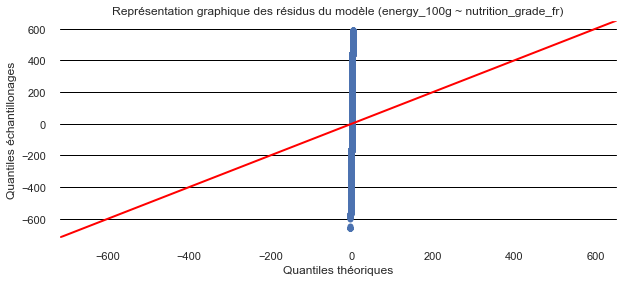

In [309]:
model = ols('energy_100g ~ nutrition_grade_fr', data=dataN).fit()

ax = plt.axes(facecolor='white')
ax.set_axisbelow(True)
plt.grid(color='w',linestyle='solid')

sm.qqplot(model.resid, line='45', ax=ax)
plt.title("Représentation graphique des résidus du modèle (energy_100g ~ nutrition_grade_fr)")
plt.xlabel('Quantiles théoriques')
plt.ylabel('Quantiles échantillonages')
ax.grid(color="black", axis='y')
ax.get_lines()[1].set_color("red")
ax.get_lines()[1].set_linewidth("2")

pylab.show()



Nous observons que les résidus ne suivent pas une loi normale, cela est flagrant avec le graphique ci-dessus.

Dans la mesure où la 2ème hypothèse pour réaliser une ANOVA n'a pu être validée, nous pouvons réaliser un test de Krusdall qui n'est pas soumis à ces hypothèses.

## b) Utilisons le test de Krusdall (utilise les rangs au lieu des moyennes)

Ce test utilise les rangs (médiane et quantile) contrairement à l'ANOVA qui utilisent les moyennes pour déterminer si des groupes sont significativement différents.

Voici les hypothèses du test de Krusdall :

- H0 :  la médiane de la population de tous les groupes est égale, si pvalue>0.05
- H1 :  la médiane de la population d'au moins un groupe n'est pas égale, si p-value<0.05

Réalisons le calcul pour toutes nos variables quantitatives.

In [229]:
for col in dataN.select_dtypes(include=['float64']).columns:
    print("colonne "+col+": "+ str(scipy.stats.kruskal(*[group[col] for name, group in dataN.groupby("nutrition_grade_fr")])))

colonne ingredients_from_palm_oil_n: KruskalResult(statistic=125.62260217216718, pvalue=3.3596662525280636e-26)
colonne ingredients_that_may_be_from_palm_oil_n: KruskalResult(statistic=511.2103130067605, pvalue=2.5197436759142743e-109)
colonne energy_100g: KruskalResult(statistic=10977.657873471639, pvalue=0.0)
colonne carbohydrates_100g: KruskalResult(statistic=1628.72575911094, pvalue=0.0)
colonne proteins_100g: KruskalResult(statistic=5002.772095817699, pvalue=0.0)
colonne fat_100g: KruskalResult(statistic=5485.459989451589, pvalue=0.0)
colonne saturated_fat_100g: KruskalResult(statistic=5587.963110374479, pvalue=0.0)
colonne fiber_100g: KruskalResult(statistic=14370.996258380785, pvalue=0.0)
colonne sugars_100g: KruskalResult(statistic=4696.182604690141, pvalue=0.0)
colonne salt_100g: KruskalResult(statistic=10133.075625299856, pvalue=0.0)
colonne sodium_100g: KruskalResult(statistic=10133.127531020027, pvalue=0.0)
colonne additives_n: KruskalResult(statistic=4504.759402805176, pva

Nous observons que nous pouvons rejeter H0, la pvalue est inférieure à 0.05.

Selon le test, la mediane d'au moins un groupe est significativement différents pour chacunes des variables.

Nous pouvons donc confirmer ce que nous avons appris sur nos groupes lors de l'analyse bivariée.

## Conclusion Nutriscore

 Voici les caractéristiques que nous avons découvertes concernant les aliments avec une note A :
- riches en fibres et en proteines 
- peu de sel, de sucre et de matières grasses (y compris en graisses saturés)
- contiennent des fruits, végétaux ou des arachides
- faible en additifs
- apport en energie proche de la moyenne

Ces aliments A s'opposent avec les aliments ayant une note E dont voici les caractéristiques :
- riches en sucre, en additif et en glucides
- pauvres en fibres, proteines, sel
- une energie qui varie beaucoup dans les extrêmes.

De plus, nous avons pu valider avec un test statistique qu'au moins un des groupes étaient différents. 

Cependant, il est important de noter que nous avons besoin d'une alimentation équilibrée. 

L'apport quotidien pour un adulte est : 
- Glucides = 250g (carbohydrates)
- lipides = 50 insaturé et 20 sature
- Protéines =	- 45 g pour une personne de 55 kg
                - 60 g pour une personne de 75 kg
- Fibres =	25 à 30 g dont une moitié issue des céréales et l'autre issue des fruits et légumes
    
En conclusion, si nous mangeons que des produits A, cela ne nous permet pas de manger équilibrer et ne permet pas d'améliorer la santé.
Comment pouvons - nous utiliser le nutriscore afin d'améliorer la santé des français?  